Import Libraries

In [104]:
import numpy as np
import pandas as pd

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [55]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
sub = pd.read_csv("SampleSubmission.csv")

***Our target is the Amount (Million Naira)***

Check out the head of the train and test data

In [56]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [57]:
test.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL18518,Abuja,BMW,323i,"2,008",White,Foreign Used,30524.0
1,VHL17149,Lagos,Toyota,Camry,"2,013",White,Foreign Used,NaN
2,VHL10927,Lagos,Toyota,Highlander Limited V6,"2,005",Gold,Foreign Used,NaN
3,VHL12909,Lagos,Toyota,Camry,"2,011",Gray,Foreign Used,166839.0
4,VHL12348,Lagos,Lexus,ES 350 FWD,"2,013",Red,Foreign Used,88862.0


Check for missing values

In [58]:
train.isnull().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

In [59]:
test.isnull().sum()

VehicleID      0
Location       0
Maker          0
Model          0
Year           2
Colour         0
Type          54
Distance     676
dtype: int64

Remove train rows where target(Amount (Million Naira)) is missing and reset the numbering

In [60]:
train = train[~train["Amount (Million Naira)"].isnull()].reset_index(drop=True)

Check if code has been effected

In [61]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


Drop redundant values i.e Vehicle ID

In [62]:
train = train.drop("VehicleID", axis=1)
test = test.drop("VehicleID", axis=1)

In [63]:
train.head()

,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [64]:
test.head()

,Location,Maker,Model,Year,Colour,Type,Distance
0,Abuja,BMW,323i,"2,008",White,Foreign Used,30524.0
1,Lagos,Toyota,Camry,"2,013",White,Foreign Used,NaN
2,Lagos,Toyota,Highlander Limited V6,"2,005",Gold,Foreign Used,NaN
3,Lagos,Toyota,Camry,"2,011",Gray,Foreign Used,166839.0
4,Lagos,Lexus,ES 350 FWD,"2,013",Red,Foreign Used,88862.0


In [65]:
# Check for missing values

train.isnull().sum()

Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)       0
Type                       196
Distance                  2352
dtype: int64

In [66]:
test.isnull().sum()

Location      0
Maker         0
Model         0
Year          2
Colour        0
Type         54
Distance    676
dtype: int64

Dealing with the categorical data one by one

In [67]:
# Fill the missing values - train data

year_train = train["Year"].mode()[0]
year_train

'2,008'

In [68]:
train["Year"].fillna(year_train, inplace=True)

In [69]:
# Fill the missing values - test data

year_test = test["Year"].mode()[0]
year_test

'2,008'

In [70]:
test["Year"].fillna(year_test, inplace=True)

In [71]:
type_train = train["Type"].mode()[0]
type_train

'Foreign Used'

In [72]:
train["Type"].fillna(type_train, inplace=True)

In [73]:
type_test = test["Type"].mode()[0]
type_test

'Foreign Used'

In [74]:
test["Type"].fillna(type_test, inplace=True)

In [75]:
"".join("2,012".split(","))

'2012'

In [76]:
train.Year = [("".join(str(i).split(","))) for i in train.Year]
train.Distance = [("".join(str(i).split(","))) for i in train.Distance]

# For test

test.Year = [("".join(str(i).split(","))) for i  in test.Year]
#test.Distance = [("".join(str(i).split(",") for i in test.Year))] - # The Distance for test is already in float

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7188 entries, 0 to 7187
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                7188 non-null   object 
 1   Maker                   7188 non-null   object 
 2   Model                   7188 non-null   object 
 3   Year                    7188 non-null   object 
 4   Colour                  7188 non-null   object 
 5   Amount (Million Naira)  7188 non-null   float64
 6   Type                    7188 non-null   object 
 7   Distance                7188 non-null   object 
dtypes: float64(1), object(7)
memory usage: 449.4+ KB


In [78]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  2061 non-null   object 
 1   Maker     2061 non-null   object 
 2   Model     2061 non-null   object 
 3   Year      2061 non-null   object 
 4   Colour    2061 non-null   object 
 5   Type      2061 non-null   object 
 6   Distance  1385 non-null   float64
dtypes: float64(1), object(6)
memory usage: 112.8+ KB


In [79]:
# To change the non-null values in strings to int or float

train.Year = pd.to_numeric(train.Year, errors = "coerce")
train.Distance = pd.to_numeric(train.Distance, errors = "coerce")

# For test

test.Year = pd.to_numeric(test.Year, errors = "coerce")
test.Distance = pd.to_numeric(test.Distance, errors = "coerce")

In [80]:
train.columns

Index(['Location', 'Maker', 'Model', 'Year', 'Colour',
       'Amount (Million Naira)', 'Type', 'Distance'],
      dtype='object')

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  2061 non-null   object 
 1   Maker     2061 non-null   object 
 2   Model     2061 non-null   object 
 3   Year      2059 non-null   float64
 4   Colour    2061 non-null   object 
 5   Type      2007 non-null   object 
 6   Distance  1385 non-null   float64
dtypes: float64(2), object(5)
memory usage: 112.8+ KB


Encoding texts to numbers

In [81]:
train_features = train.select_dtypes(include=['object']).columns
train_features

Index(['Location', 'Maker', 'Model', 'Colour', 'Type'], dtype='object')

In [82]:
test_features = test.select_dtypes(include=['object']).columns
test_features

Index(['Location', 'Maker', 'Model', 'Colour', 'Type'], dtype='object')

In [83]:
train['Location'].astype('category').cat.codes

0       0
1       1
2       2
3       0
4       1
       ..
7183    0
7184    0
7185    0
7186    2
7187    0
Length: 7188, dtype: int8

In [84]:
test['Location'].astype('category').cat.codes

0       0
1       2
2       2
3       2
4       2
       ..
2056    0
2057    1
2058    1
2059    0
2060    0
Length: 2061, dtype: int8

In [85]:
for train_feature in train_features:
    train[train_feature] = train[train_feature].astype('category').cat.codes

In [86]:
train

,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,0,17,116,2011,16,2.20,2,NaN
1,1,19,1047,2012,16,3.50,2,125000.0
2,2,29,906,2010,15,9.20,1,110852.0
3,0,34,506,2017,2,22.80,1,30000.0
4,1,52,567,2002,15,2.60,2,125206.0
...,...,...,...,...,...,...,...,...
7183,0,17,319,2018,7,5.70,1,65000.0
7184,0,3,1170,2007,19,4.00,2,200000.0
7185,0,52,858,2010,1,2.85,2,NaN
7186,2,34,510,2012,1,8.65,1,85750.0


In [89]:
for test_feature in test_features:
    test[test_feature] = test[test_feature].astype('category').cat.codes

In [90]:
test

,Location,Maker,Model,Year,Colour,Type,Distance
0,0,2,8,2008,16,1,30524.0
1,2,37,123,2013,16,1,NaN
2,2,37,272,2005,7,1,NaN
3,2,37,123,2011,8,1,166839.0
4,2,20,192,2013,12,1,88862.0
...,...,...,...,...,...,...,...
2056,0,37,74,2020,12,1,2650.0
2057,1,1,391,2011,3,1,99000.0
2058,1,37,123,2015,2,1,108000.0
2059,0,20,302,2013,16,1,52485.0


Forgot to replace the NaN values for both train and test, so i'll do it now

In [93]:
train_distance = train["Distance"].mean()
train_distance

103239.01199338296

In [95]:
test_distance = test["Distance"].mean()
test_distance

103800.66859205776

In [96]:
train["Distance"].fillna(train_distance, inplace=True)

In [97]:
test["Distance"].fillna(test_distance, inplace=True)

In [98]:
test

,Location,Maker,Model,Year,Colour,Type,Distance
0,0,2,8,2008,16,1,30524.000000
1,2,37,123,2013,16,1,103800.668592
2,2,37,272,2005,7,1,103800.668592
3,2,37,123,2011,8,1,166839.000000
4,2,20,192,2013,12,1,88862.000000
...,...,...,...,...,...,...,...
2056,0,37,74,2020,12,1,2650.000000
2057,1,1,391,2011,3,1,99000.000000
2058,1,37,123,2015,2,1,108000.000000
2059,0,20,302,2013,16,1,52485.000000


In [99]:
train

,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,0,17,116,2011,16,2.20,2,103239.011993
1,1,19,1047,2012,16,3.50,2,125000.000000
2,2,29,906,2010,15,9.20,1,110852.000000
3,0,34,506,2017,2,22.80,1,30000.000000
4,1,52,567,2002,15,2.60,2,125206.000000
...,...,...,...,...,...,...,...,...
7183,0,17,319,2018,7,5.70,1,65000.000000
7184,0,3,1170,2007,19,4.00,2,200000.000000
7185,0,52,858,2010,1,2.85,2,103239.011993
7186,2,34,510,2012,1,8.65,1,85750.000000


Modelling

In [100]:
catboost_model = CatBoostRegressor()
lightgbm_model = LGBMRegressor()

Train Test Split

In [102]:
x = train.drop("Amount (Million Naira)", axis=1)
y = train["Amount (Million Naira)"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [103]:
catboost_model.fit(x_train, y_train)

Learning rate set to 0.054416
0:	learn: 25.0851096	total: 162ms	remaining: 2m 41s
1:	learn: 24.3991671	total: 171ms	remaining: 1m 25s
2:	learn: 23.7239683	total: 178ms	remaining: 59.1s
3:	learn: 23.0990343	total: 182ms	remaining: 45.3s
4:	learn: 22.5145834	total: 186ms	remaining: 37s
5:	learn: 21.9692681	total: 190ms	remaining: 31.5s
6:	learn: 21.5038108	total: 195ms	remaining: 27.7s
7:	learn: 20.9898703	total: 200ms	remaining: 24.8s
8:	learn: 20.5214113	total: 204ms	remaining: 22.5s
9:	learn: 20.0886388	total: 207ms	remaining: 20.5s
10:	learn: 19.6588904	total: 212ms	remaining: 19s
11:	learn: 19.3129021	total: 214ms	remaining: 17.6s
12:	learn: 18.9338297	total: 216ms	remaining: 16.4s
13:	learn: 18.5842361	total: 219ms	remaining: 15.4s
14:	learn: 18.2559632	total: 221ms	remaining: 14.5s
15:	learn: 17.9448215	total: 224ms	remaining: 13.8s
16:	learn: 17.6284076	total: 226ms	remaining: 13.1s
17:	learn: 17.3273602	total: 228ms	remaining: 12.4s
18:	learn: 17.0643500	total: 230ms	remaining: 

160:	learn: 9.1225042	total: 509ms	remaining: 2.65s
161:	learn: 9.1041921	total: 511ms	remaining: 2.65s
162:	learn: 9.0920775	total: 514ms	remaining: 2.64s
163:	learn: 9.0737394	total: 516ms	remaining: 2.63s
164:	learn: 9.0542872	total: 519ms	remaining: 2.63s
165:	learn: 9.0404795	total: 522ms	remaining: 2.62s
166:	learn: 9.0199230	total: 524ms	remaining: 2.61s
167:	learn: 8.9942663	total: 527ms	remaining: 2.61s
168:	learn: 8.9672837	total: 530ms	remaining: 2.61s
169:	learn: 8.9346198	total: 534ms	remaining: 2.6s
170:	learn: 8.9194223	total: 537ms	remaining: 2.6s
171:	learn: 8.9143449	total: 540ms	remaining: 2.6s
172:	learn: 8.8991731	total: 541ms	remaining: 2.59s
173:	learn: 8.8740531	total: 543ms	remaining: 2.58s
174:	learn: 8.8660222	total: 546ms	remaining: 2.57s
175:	learn: 8.8462476	total: 548ms	remaining: 2.57s
176:	learn: 8.8272561	total: 552ms	remaining: 2.56s
177:	learn: 8.7996403	total: 553ms	remaining: 2.56s
178:	learn: 8.7802428	total: 555ms	remaining: 2.55s
179:	learn: 8.7

332:	learn: 6.9491859	total: 859ms	remaining: 1.72s
333:	learn: 6.9460539	total: 861ms	remaining: 1.72s
334:	learn: 6.9430202	total: 863ms	remaining: 1.71s
335:	learn: 6.9300115	total: 866ms	remaining: 1.71s
336:	learn: 6.9233212	total: 870ms	remaining: 1.71s
337:	learn: 6.9084024	total: 873ms	remaining: 1.71s
338:	learn: 6.9055183	total: 876ms	remaining: 1.71s
339:	learn: 6.8991212	total: 879ms	remaining: 1.71s
340:	learn: 6.8917966	total: 881ms	remaining: 1.7s
341:	learn: 6.8840524	total: 884ms	remaining: 1.7s
342:	learn: 6.8762089	total: 886ms	remaining: 1.7s
343:	learn: 6.8693431	total: 892ms	remaining: 1.7s
344:	learn: 6.8631906	total: 897ms	remaining: 1.7s
345:	learn: 6.8543926	total: 901ms	remaining: 1.7s
346:	learn: 6.8497897	total: 904ms	remaining: 1.7s
347:	learn: 6.8463671	total: 906ms	remaining: 1.7s
348:	learn: 6.8418982	total: 908ms	remaining: 1.69s
349:	learn: 6.8382325	total: 910ms	remaining: 1.69s
350:	learn: 6.8332639	total: 911ms	remaining: 1.69s
351:	learn: 6.829725

504:	learn: 5.9175328	total: 1.21s	remaining: 1.18s
505:	learn: 5.9157726	total: 1.21s	remaining: 1.18s
506:	learn: 5.9128451	total: 1.21s	remaining: 1.18s
507:	learn: 5.9037440	total: 1.21s	remaining: 1.18s
508:	learn: 5.8999887	total: 1.22s	remaining: 1.17s
509:	learn: 5.8963148	total: 1.22s	remaining: 1.17s
510:	learn: 5.8925819	total: 1.22s	remaining: 1.17s
511:	learn: 5.8838224	total: 1.22s	remaining: 1.17s
512:	learn: 5.8756592	total: 1.22s	remaining: 1.16s
513:	learn: 5.8671090	total: 1.23s	remaining: 1.16s
514:	learn: 5.8512275	total: 1.23s	remaining: 1.16s
515:	learn: 5.8435186	total: 1.23s	remaining: 1.15s
516:	learn: 5.8361985	total: 1.23s	remaining: 1.15s
517:	learn: 5.8300536	total: 1.24s	remaining: 1.15s
518:	learn: 5.8213569	total: 1.24s	remaining: 1.15s
519:	learn: 5.8184471	total: 1.24s	remaining: 1.15s
520:	learn: 5.8157209	total: 1.24s	remaining: 1.14s
521:	learn: 5.8139134	total: 1.24s	remaining: 1.14s
522:	learn: 5.8067515	total: 1.25s	remaining: 1.14s
523:	learn: 

685:	learn: 5.1499115	total: 1.56s	remaining: 713ms
686:	learn: 5.1479885	total: 1.56s	remaining: 711ms
687:	learn: 5.1439582	total: 1.56s	remaining: 708ms
688:	learn: 5.1417297	total: 1.56s	remaining: 706ms
689:	learn: 5.1363591	total: 1.56s	remaining: 704ms
690:	learn: 5.1320314	total: 1.57s	remaining: 701ms
691:	learn: 5.1278573	total: 1.57s	remaining: 699ms
692:	learn: 5.1205221	total: 1.57s	remaining: 697ms
693:	learn: 5.1168395	total: 1.58s	remaining: 695ms
694:	learn: 5.1143555	total: 1.58s	remaining: 693ms
695:	learn: 5.1112616	total: 1.58s	remaining: 690ms
696:	learn: 5.1074956	total: 1.58s	remaining: 688ms
697:	learn: 5.1058912	total: 1.58s	remaining: 685ms
698:	learn: 5.1034500	total: 1.58s	remaining: 683ms
699:	learn: 5.0985510	total: 1.59s	remaining: 680ms
700:	learn: 5.0903356	total: 1.59s	remaining: 678ms
701:	learn: 5.0884524	total: 1.59s	remaining: 676ms
702:	learn: 5.0846093	total: 1.59s	remaining: 673ms
703:	learn: 5.0806674	total: 1.59s	remaining: 671ms
704:	learn: 

862:	learn: 4.5747815	total: 1.91s	remaining: 303ms
863:	learn: 4.5729413	total: 1.91s	remaining: 301ms
864:	learn: 4.5716842	total: 1.91s	remaining: 298ms
865:	learn: 4.5674054	total: 1.91s	remaining: 296ms
866:	learn: 4.5653437	total: 1.92s	remaining: 294ms
867:	learn: 4.5616470	total: 1.92s	remaining: 292ms
868:	learn: 4.5579658	total: 1.92s	remaining: 289ms
869:	learn: 4.5559697	total: 1.92s	remaining: 287ms
870:	learn: 4.5514386	total: 1.92s	remaining: 285ms
871:	learn: 4.5479492	total: 1.93s	remaining: 283ms
872:	learn: 4.5446490	total: 1.93s	remaining: 280ms
873:	learn: 4.5417947	total: 1.93s	remaining: 278ms
874:	learn: 4.5376987	total: 1.93s	remaining: 276ms
875:	learn: 4.5349833	total: 1.94s	remaining: 274ms
876:	learn: 4.5334762	total: 1.94s	remaining: 272ms
877:	learn: 4.5308443	total: 1.94s	remaining: 269ms
878:	learn: 4.5283807	total: 1.94s	remaining: 267ms
879:	learn: 4.5249837	total: 1.94s	remaining: 265ms
880:	learn: 4.5223694	total: 1.94s	remaining: 263ms
881:	learn: 

In [105]:
# Check local score

mean_squared_error(y_test, catboost_model.predict(x_test))

158.99569745406657

Check which features are the most important

<AxesSubplot:>

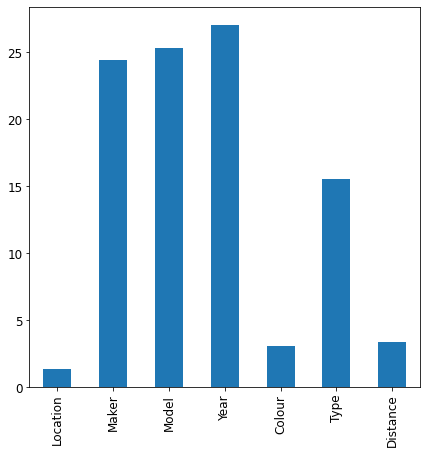

In [106]:
pd.Series(catboost_model.feature_importances_, index=x_train.columns).plot(kind="bar", figsize=(7,7), fontsize=12)

In [108]:
sub_01 = sub.copy()

In [109]:
sub_01.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,1.0
1,VHL17149,1.0
2,VHL10927,1.0
3,VHL12909,1.0
4,VHL12348,1.0


In [110]:
answer_1 = catboost_model.predict(test)

In [111]:
sub_01["Amount (Million Naira)"] = answer_1

In [112]:
sub_01.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,6.182780
1,VHL17149,6.475218
2,VHL10927,2.107147
3,VHL12909,3.879295
4,VHL12348,4.571945


In [113]:
sub_01.to_csv("Catboost answer.csv", index=False)

LightGBM

In [114]:
lightgbm_model.fit(x_train, y_train)

LGBMRegressor()

In [115]:
# Check score

mean_squared_error(y_test, lightgbm_model.predict(x_test))

186.78322003479505

<AxesSubplot:>

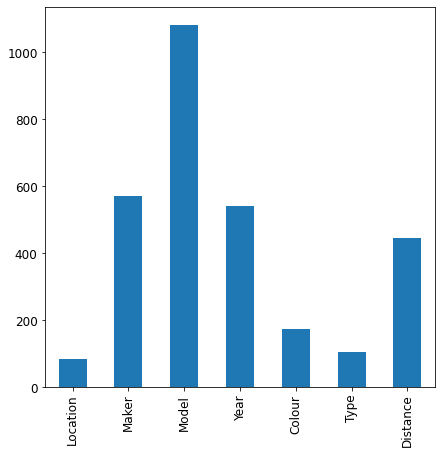

In [116]:
pd.Series(lightgbm_model.feature_importances_, index=x_train.columns).plot(kind="bar", figsize=(7,7), fontsize=12)

In [123]:
answer_2 = lightgbm_model.predict(test)

In [124]:
sub_02 = sub.copy()

In [125]:
answer_2 = sub_02["Amount (Million Naira)"]

In [126]:
sub_02.to_csv("LightGBM answer.csv", index=False)

In [127]:
sub_02.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,1.0
1,VHL17149,1.0
2,VHL10927,1.0
3,VHL12909,1.0
4,VHL12348,1.0


Ensemble

In [128]:
sub_ensemble = sub.copy()

In [129]:
sub_ensemble["Amount (Million Naira)"] = 0.75*sub_01["Amount (Million Naira)"] + 0.25*sub_02["Amount (Million Naira)"]

In [130]:
sub_ensemble.to_csv("Ensemble Result.csv", index=False)